#Self Organizing Map

##Install MiniSom Package

In [2]:
import minisom

### Importing the libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

2022-10-02 15:19:58.651645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Importing the dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values # create input vector
y = dataset.iloc[:, -1].values

## Feature Scaling


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [6]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5) # 10*10 그리드, simga = 그리드에서 다른 이웃간의 반지름, leraning_rate = 수렴 속도
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

##Visualizing the results


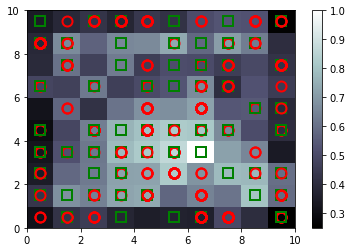

In [7]:
# winning node에 다른 색깔을 부여하여 outlier(MID)를 감지
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#### SOM을 보면 

## Finding the frauds


##Printing the Fraunch Clients

In [10]:
mappings = som.win_map(X) # winning node에 연결된 고객들의 좌표를 반환
frauds = np.concatenate((mappings[(3,8)], mappings[(6, 4)]), axis = 0) # 의심되는 자표들의 고객명단 반환
frauds = sc.inverse_transform(frauds)

In [14]:
for i in frauds[:, 0]:
    print(i)

15789201.0
15801817.0
15684722.0
15757188.0
15635598.0
15647191.0
15623369.0
15793896.0
15650591.0
15633608.0
15675450.0
